In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB

# 1. Load Dataset
file_path = "D:/dm_assignment/datasets/naive_bayes_dataset.csv"
df = pd.read_csv(file_path)

# Features and target
X = df[['Age', 'Income', 'Buyer', 'Credit_rating']]
y = df['Buys_laptop']

In [2]:
# Encode categorical features
encoders = {}
for col in X.columns:
    enc = LabelEncoder()
    X[col] = enc.fit_transform(X[col])
    encoders[col] = enc

y_enc = LabelEncoder().fit_transform(y)

# 2. Train Naive Bayes with Laplace smoothing (alpha=1)
nb = CategoricalNB(alpha=1.0)
nb.fit(X, y_enc)

print("Model trained successfully with Laplace smoothing.")

Model trained successfully with Laplace smoothing.


C:\Users\USER\AppData\Local\Temp\ipykernel_28524\4049075406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = enc.fit_transform(X[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_28524\4049075406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = enc.fit_transform(X[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_28524\4049075406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [3]:
# 3. Prediction on new data
new_data = pd.DataFrame({
    "Age": ["<=30"],
    "Income": ["Average"],
    "Buyer": ["Yes"],
    "Credit_rating": ["Fair"]
})

# Encode using same encoders
for col in new_data.columns:
    new_data[col] = encoders[col].transform(new_data[col])

# Predict
prediction = nb.predict(new_data)[0]
prediction_label = "Yes" if prediction == 1 else "No"

print("Prediction for new data:", prediction_label)

Prediction for new data: Yes


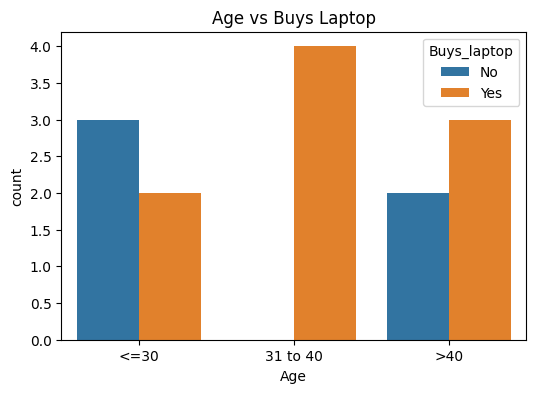

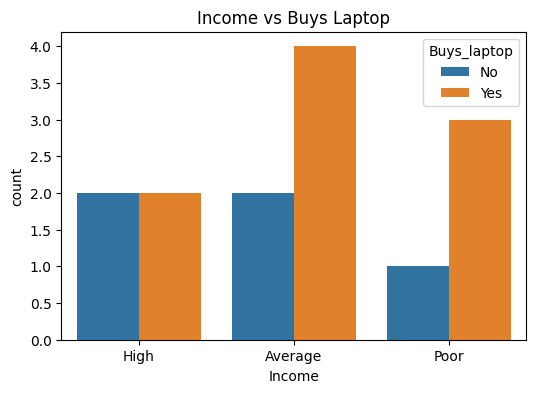

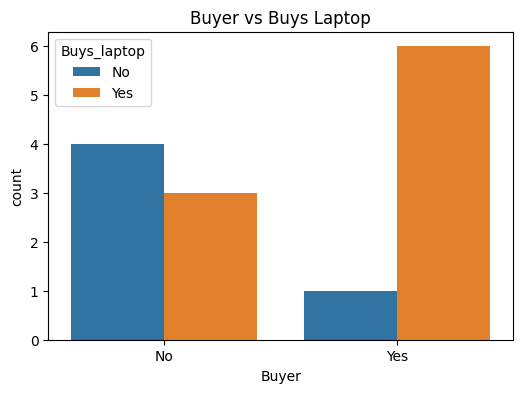

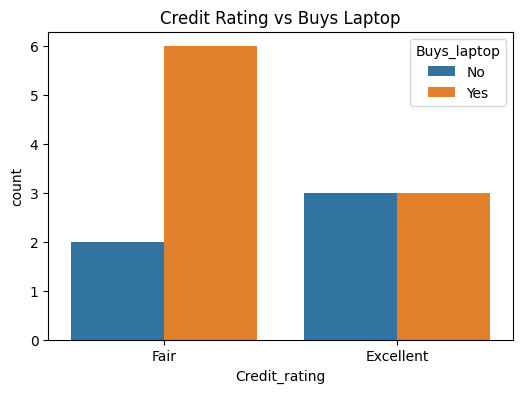

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Distribution of Age vs Buys Laptop
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Age", hue="Buys_laptop")
plt.title("Age vs Buys Laptop")
plt.show()

# Plot 2: Distribution of Income vs Buys Laptop
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Income", hue="Buys_laptop")
plt.title("Income vs Buys Laptop")
plt.show()

# Plot 3: Distribution of Buyer vs Buys Laptop
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Buyer", hue="Buys_laptop")
plt.title("Buyer vs Buys Laptop")
plt.show()

# Plot 4: Distribution of Credit Rating vs Buys Laptop
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Credit_rating", hue="Buys_laptop")
plt.title("Credit Rating vs Buys Laptop")
plt.show()